In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class XY():
    
    def __init__(self,n1,n2,T,B=1,J=1):
        self.n1 = n1
        self.n2 = n2
        # Matrix of entries: every point is a angle between -180° and 180°
        self.matrix = (np.random.random_sample(size=(n1, n2)) * 360) -180 
        self.matrix_components = np.zeros((n1,n2,2))
        self.ham = [] 
        self.mag = []
        self.B = B
        self.J = J
        self.T = T
  
    # Compute the interaction between one spin and first neighbors
    def get_onepoint_interaction(self,i,j,theta):
        interaction = - self.J * (np.cos(theta - self.matrix[(i+1)%self.n1,j]) 
                                 + np.cos(theta - self.matrix[i-1,j])
                                 + np.cos(theta - self.matrix[i,(j+1)%self.n2])
                                 + np.cos(theta - self.matrix[i,j-1]) 
                                 )
        return interaction
            
            
    def get_total_interaction(self):
        # list of pairs of adjacent sites as four-element tuples:
        # (i1, j1, i2, j2) represents two adjacent sites located
        # at (i1, j1) and (i2, j2)
        horizontal_edges = [
            (i, j-1, i, j)
            for i in range(self.n1) for j in range(self.n2)
        ]
        vertical_edges = [
            (i-1, j, i, j)
            for i in range(self.n1) for j in range(self.n2)
        ]
        # summing lists in python concatenates them
        # [1, 2, 3] + [4, 5] = [1, 2, 3, 4, 5]
        edges = horizontal_edges + vertical_edges
        E = 0
        for i1, j1, i2, j2 in edges:
            E -= self.J * np.cos( self.matrix[i1,j1]-self.matrix[i2,j2] )
        return E                          
    
    def update_mag(self):
        m = self.mag.append( np.sum( np.cos(self.matrix) ) )

    
    def update_ham(self):
        # Compute the energy of interactions
        h = self.get_total_interaction()
        # Compute the energy of external field
        self.update_mag()
        h -= self.B * self.mag[-1] # ! the signe "-" is different from the Ising model, that had a "+"
        self.ham.append(h)
            
    def rotate_one_point(self,i,j):
        self.matrix[i,j] = np.random.choice([-180,180])
              
    # deltaE -> difference btw final energy and initial energy of the single point (before and after the eventual swap)
    def metropolis(self, n_updates):
        for _ in range(n_updates):
            i = np.random.randint(self.n1)
            j = np.random.randint(self.n2)
            E_i = self.get_onepoint_interaction(i, j, self.matrix[i,j])
            temporal_change = np.random.random_sample()*360 - 180
            E_f = self.get_onepoint_interaction(i, j, temporal_change)
            deltaE = - ( np.cos(temporal_change)-np.cos(self.matrix[i,j])) * self.B +(E_f - E_i)
            if deltaE < 0:
                self.matrix[i,j] = temporal_change
                #print("flippato deltaE minore")
            else:
                  # what is k_B???
                if np.random.uniform() < np.exp(-deltaE/self.T):
                    self.matrix[i,j] = temporal_change     
                    #print("flippato deltaE maggiore")


    def update_matrix_components(self):
        for i in range (self.n1):
            for j in range (self.n2):
                self.matrix_components[i,j,0] = np.cos(self.matrix[i,j])
                self.matrix_components[i,j,1] = np.sin(self.matrix[i,j])
                    
    def visualize(self):
        self.update_matrix_components()
        fig, ax = plt.subplots(figsize=(8,8))
        ax.quiver(self.matrix_components[:,:,0], self.matrix_components[:,:,1])
        
    def visualize_stream(self):
        self.update_matrix_components()
        x = np.linspace(0, self.n1, self.n1)
        y = np.linspace(0, self.n2, self.n2)
        X, Y = np.meshgrid(x, y)
        fig, ax = plt.subplots(figsize=(8,8))
        ax.streamplot(x,y,self.matrix_components[:,:,0], self.matrix_components[:,:,1], density=2, arrowstyle='->', arrowsize=1.5)
    
    def visualize_heatmap(self):
        self.update_matrix_components()
        fig, ax = plt.subplots(1, 1, figsize=(10, 8))
        ax.set_aspect(1)
        sns.heatmap(self.matrix, ax=ax, cmap="viridis")

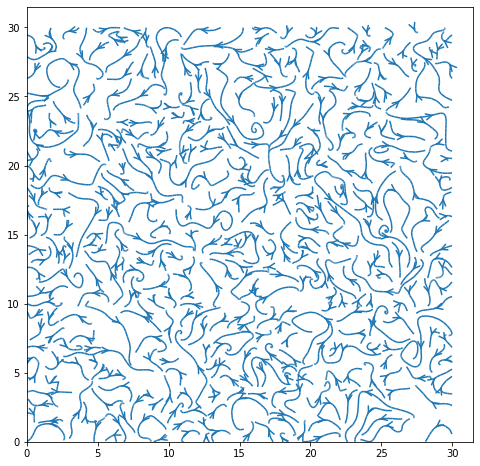

In [11]:
T_c = 2/np.log(1+np.sqrt(2))
T = 0.01

xy = XY(30, 30, T, 0, 1)
xy.visualize_stream()

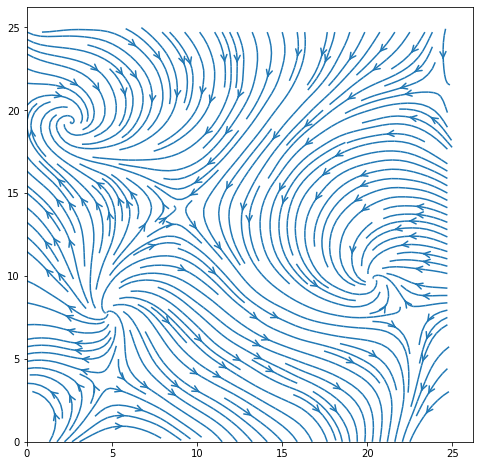

In [9]:
xy.metropolis(400000)
xy.visualize_stream()

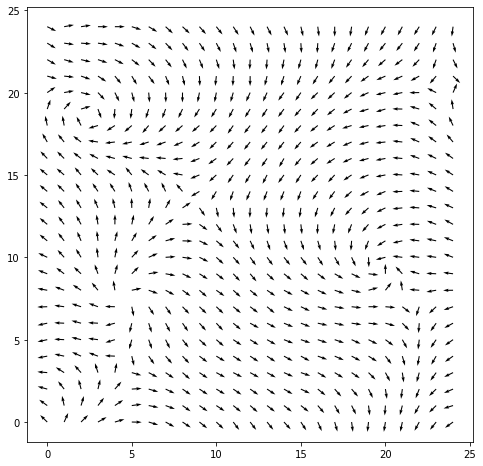

In [10]:
xy.visualize()